In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_1 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '06').all()

In [5]:
#  3. Convert the June temperatures to a list.
june_results = list(results_1)

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns = ['index','June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_2 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == '12').all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_results = list(results_2)

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['index', 'December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Create one line chart with two axes to see average temperatures and precipitation month to month

In [12]:
monthly_temp = pd.DataFrame()

In [13]:
month_list = [{'01':'January'},\
              {'02':'February'},\
              {'03':'March'},\
              {'04':'April'},\
              {'05':'May'},\
              {'06':'June'},\
              {'07':'July'},\
              {'08':'August'},\
              {'09':'September'},\
              {'10':'October'},\
              {'11':'November'},\
              {'12':'December'}]                      

In [14]:
# the key was the df_dic the month the iterration was on df_dic = {df_dic[month] : dataframe of temps}
df_dic = {}
proj_df = pd.DataFrame()
df_combo = pd.DataFrame()

for dic in month_list:
    for key, val in dic.items():
        avg_temp = session.query(Measurement.tobs).\
                filter(extract('month', Measurement.date) == key).all()
        df_dic[val] = pd.DataFrame(avg_temp, columns=[val])
        df_combo = pd.concat([df_combo, df_dic[val]])

In [15]:
new_df = df_combo.describe()
new_df = new_df.transpose()
new_df.index.name = 'Month'
new_df = new_df.drop(['count','25%','50%','75%','std'], axis=1)
new_df_t = new_df.add_prefix('t_')

In [16]:
#same logic as above, just with precipitation table
df_dic = {}
df_combo=pd.DataFrame()

for dic in month_list:
    for key, val in dic.items():
        avg_prcp = session.query(Measurement.prcp).\
                filter(extract('month', Measurement.date) == key).all()
        df_dic[val] = pd.DataFrame(avg_prcp, columns=[val])
        df_combo = pd.concat([df_combo, df_dic[val]])

In [17]:
new_df = df_combo.describe()
new_df = new_df.transpose()
new_df.index.name = 'Month'
new_df = new_df.drop(['count','25%','50%','75%','std'], axis=1)
new_df_p = new_df.add_prefix('p_')

In [18]:
# Create shortened month names to declutter graph
proj_df = (new_df_t.join(new_df_p))
xaxis_labels = proj_df.index.str[:3]

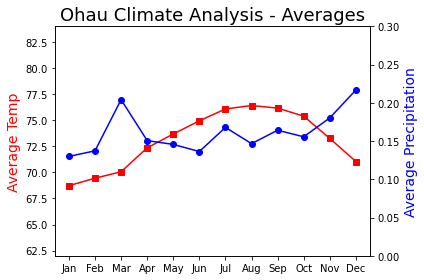

In [19]:
# create figure and axis objects with subplots()
fig,ax1=plt.subplots()
ax2 = ax1.twinx()

xaxis = proj_df.index.values.tolist()
xaxis = proj_df.index.str[:3]
# yaxis = proj_df.t_mean.values.tolist()
# yaxis2 = proj_df.p_mean.values.tolist()

yaxis = proj_df.t_mean.values.tolist()
ax1.plot(xaxis,yaxis,color='red',marker='s')

yaxis2 = proj_df.p_mean.values.tolist()
ax2.plot(xaxis,yaxis2,color='blue',marker='o')

ax1.set_ylabel('Average Temp',color='red',fontsize=14)
ax1.set_ylim((62,84))
ax2.set_ylabel('Average Precipitation',color='blue',fontsize=14)
ax2.set_ylim((0,0.3))

plt.grid(True,'minor','both')
plt.title('Ohau Climate Analysis - Averages',fontsize=18)

#ax.legend(handles=(['Temp','Rain'])
fig.tight_layout()
plt.show()

#save the plot as a file
fig.savefig('readme_resources/year_average.png',  
            format='png',
            dpi=100,
            bbox_inches='tight')

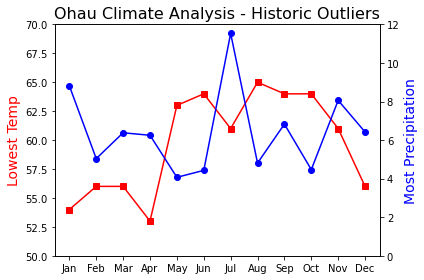

In [20]:
# create figure and axis objects with subplots()
fig,ax1=plt.subplots()
ax2 = ax1.twinx()

xaxis = proj_df.index.values.tolist()
xaxis = proj_df.index.str[:3]
# yaxis = proj_df.t_mean.values.tolist()
# yaxis2 = proj_df.p_mean.values.tolist()

yaxis = proj_df.t_min.values.tolist()
ax1.plot(xaxis,yaxis,color='red',marker='s')

yaxis2 = proj_df.p_max.values.tolist()
ax2.plot(xaxis,yaxis2,color='blue',marker='o')

ax1.set_ylabel('Lowest Temp',color='red',fontsize=14)
ax1.set_ylim((50,70))
ax2.set_ylabel('Most Precipitation',color='blue',fontsize=14)
ax2.set_ylim((0,12))

plt.grid(True,'minor','both')
plt.title('Ohau Climate Analysis - Historic Outliers',fontsize=16)

#ax.legend(handles=(['Temp','Rain'])
fig.tight_layout()
plt.show()

#save the plot as a file
fig.savefig('readme_resources/outliers.png',  
            format='png',
            dpi=100,
            bbox_inches='tight')